# Line graph example

In [1]:
import utils.data_loader as loader
import networkx as nx
import torch
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm

torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

In [2]:
ori_edges = [(0, 1), (1, 2), (2, 3), (3, 4)]#, (4,5), (5,6)]
sensit = np.ones(np.unique(ori_edges).shape)

In [3]:
pos = {
    0: (0, 0),
    1: (1, 0),
    2: (2, 0),
    3: (3, 0),
    4: (4, 0),
}

exact


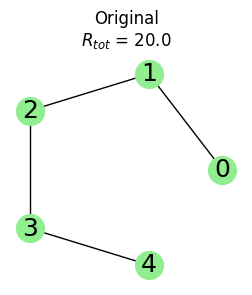

In [4]:
edges = ori_edges
edges = np.vstack((np.array(edges), np.array(edges)[:,[1,0]])).T
edges = torch.Tensor(edges).long()
GW = loader.load_data('edgelist', device= 'cpu', edgelist = edges, sens = sensit)

G = nx.from_edgelist(GW.edgelist.numpy().T)
pos = nx.circular_layout(G)
plt.figure(figsize=(3,3))
plt.title(f'Original\n$R_{{tot}}$ = {GW.get_effective_resistance().sum().item()/2:.3}')
nx.draw(G, with_labels=True,pos=pos, node_color='lightgreen', node_size=400, font_size=18, width=1)

exact


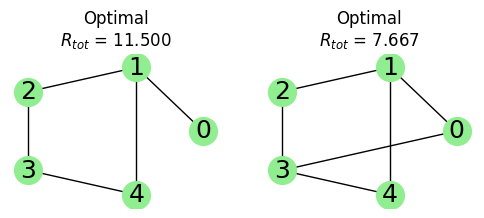

In [5]:
edges = ori_edges
edges = np.vstack((np.array(edges), np.array(edges)[:,[1,0]])).T
edges = torch.Tensor(edges).long()
GW = loader.load_data('edgelist', device= 'cpu', edgelist = edges, sens = sensit)

GW.add_link(1, 4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
G = nx.from_edgelist(GW.edgelist.numpy().T)
ax1.set_title(f'Optimal\n$R_{{tot}}$ = {GW.get_effective_resistance().sum().item()/2:.3f}')
nx.draw(G, with_labels=True,pos=pos, node_color='lightgreen', node_size=400, font_size=18, width=1, ax=ax1)

GW.add_link(0, 3)

G = nx.from_edgelist(GW.edgelist.numpy().T)
ax2.set_title(f'Optimal\n$R_{{tot}}$ = {GW.get_effective_resistance().sum().item()/2:.3f}')
nx.draw(G, with_labels=True,pos=pos, node_color='lightgreen', node_size=400, font_size=18, width=1)

exact


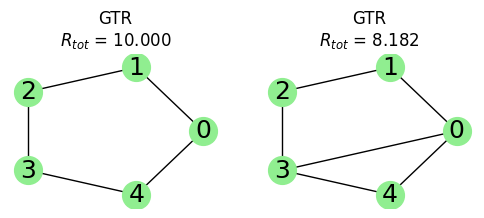

In [6]:
edges = ori_edges
edges = np.vstack((np.array(edges), np.array(edges)[:,[1,0]])).T
edges = torch.Tensor(edges).long()
GW = loader.load_data('edgelist', device= 'cpu', edgelist = edges, sens = sensit)

GW.add_link(0, 4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
G = nx.from_edgelist(GW.edgelist.numpy().T)
ax1.set_title(f'GTR\n$R_{{tot}}$ = {GW.get_effective_resistance().sum().item()/2:.3f}')
nx.draw(G, with_labels=True,pos=pos, node_color='lightgreen', node_size=400, font_size=18, width=1, ax=ax1)

GW.add_link(0, 3)

G = nx.from_edgelist(GW.edgelist.numpy().T)
ax2.set_title(f'GTR\n$R_{{tot}}$ = {GW.get_effective_resistance().sum().item()/2:.3f}')
nx.draw(G, with_labels=True,pos=pos, node_color='lightgreen', node_size=400, font_size=18, width=1)

exact


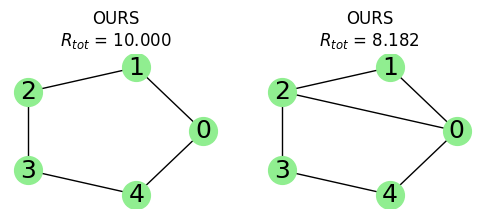

In [7]:
edges = ori_edges
edges = np.vstack((np.array(edges), np.array(edges)[:,[1,0]])).T
edges = torch.Tensor(edges).long()
GW = loader.load_data('edgelist', device= 'cpu', edgelist = edges, sens = sensit)

# Get link
u, v = divmod(torch.argmax(GW.get_effective_resistance()).item(), GW.num_nodes)
GW.add_link(u, v)

#Draw
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
G = nx.from_edgelist(GW.edgelist.numpy().T)
ax1.set_title(f'OURS\n$R_{{tot}}$ = {GW.get_effective_resistance().sum().item()/2:.3f}')
nx.draw(G, with_labels=True,pos=pos, node_color='lightgreen', node_size=400, font_size=18, width=1, ax=ax1)

#Get link
u, v = divmod(torch.argmax(GW.get_effective_resistance()).item(), GW.num_nodes)
GW.add_link(u, v)

#draw
G = nx.from_edgelist(GW.edgelist.numpy().T)
ax2.set_title(f'OURS\n$R_{{tot}}$ = {GW.get_effective_resistance().sum().item()/2:.3f}')
nx.draw(G, with_labels=True,pos=pos, node_color='lightgreen', node_size=400, font_size=18, width=1)

#figure with 2 subplots
